<a href="https://colab.research.google.com/github/helithiga/Traffic_Violation_Analysis/blob/main/Traffic_Violations_Maryland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Violation Analysis**

# **Download Java**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#  **Install Apache Spark 3.0.1 with Hadoop 2.7**

In [2]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# **Unzip Folder**

In [3]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# **Install Find Spark**

> It will locate Spark on the system and import it as a regular library.



In [4]:
!pip install -q findspark

# **Settin up Envirnmental Variables**


> This will enable us to run Pyspark in the Colab environment.



In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [6]:
import findspark
findspark.init()

In [7]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

# **Import dataset from the Drive**

In [8]:
# Mounting Drive to import the data
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


# **Loading data to PySpark**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions as f
from pyspark.sql.functions import *
from pyspark.sql.types import DateType

In [11]:
# Load data to Task 1. Replace the path of the dataset
data = spark.read.csv('/content/MyDrive/MyDrive/BigData/Dataset/DataSet.csv',header=True)
data.show()

+------------+------------+--------------------+--------------------+-----+---------------+---------------+-------+---------------+-----------+--------------+-----------------------+----+
|Date Of Stop|Time Of Stop|           SubAgency|            Location|Belts|Personal Injury|Property Damage|Alcohol|    VehicleType|       Make|Violation Type|Contributed To Accident|Year|
+------------+------------+--------------------+--------------------+-----+---------------+---------------+-------+---------------+-----------+--------------+-----------------------+----+
|  09/24/2013|    17:11:00|3rd district, Sil...|     8804 FLOWER AVE|   No|             No|             No|     No|02 - Automobile|       FORD|      Citation|                     No|2008|
|  08/29/2017|    10:19:00|2nd district, Bet...|WISCONSIN AVE@ EL...|   No|             No|             No|     No|02 - Automobile|     TOYOTA|      Citation|                     No|2001|
|  12/01/2014|    12:52:00|6th district, Gai...|CHRISTOPHER 

### **1. Identify the probability of accidents which occur when the driver is without seat belts and with alcohol**

In [14]:
# selecting relevant columns
df_task1 = data.select('Belts','Alcohol','Contributed to Accident')

# Filter data with seat belt violations and without alcohol
df_task2 = df_task1.where(df_task1['Belts'] == 'Yes')
df_task2 = df_task2.where(df_task2['Alcohol'] == 'No')

count1 = df_task2.agg({"Belts":"count"})
count1 = count1.withColumnRenamed("count(Belts)","BeltViolationsOnlyCount")

df_task2.show()

#counting number of occurrence
x1 = df_task2.count()
print (x1)

#----------------------------------------------------------------------------------

# Filter accidents with seat belt violation only
df_task3 = df_task2.where(df_task2['Contributed to Accident'] == 'Yes')

count2 = df_task3.agg({"Contributed to Accident":"count"})
count2 = count2.withColumnRenamed("count(Contributed to Accident)","BeltViolationsAccidentsCount")

df_task3.show()

#counting number of occurrence
y1 = df_task3.count()
print (y1)

#-----------------------------------------------------------------------------------

# Filter data related to alcohol
df_task4 = df_task1.where(df_task1['Alcohol'] == 'Yes')
df_task4 = df_task4.where(df_task4['Belts'] == 'No')

count3 = df_task4.agg({"Alcohol":"count"})
count3 = count3.withColumnRenamed("count(Alcohol)","WithAlcoholOnlyCount")

df_task4.show()

#counting number of occurrence
x2 = df_task4.count()
print (x2)


#------------------------------------------------------------------------------------

# Filter accidents with alcohol only
df_task5 = df_task4.where(df_task4['Contributed to Accident'] == 'Yes')

count4 = df_task5.agg({"Contributed to Accident":"count"})
count4 = count4.withColumnRenamed("count(Contributed to Accident)","WithAlcoholAccidentsCount")

df_task5.show()

#counting number of occurrence
y2 = df_task5.count()
print (y2)

# Filter data related to both
df_task6 = df_task1.where(df_task1['Alcohol'] == 'Yes')
df_task6 = df_task6.where(df_task6['Belts'] == 'Yes')

count5 = df_task6.agg({"Alcohol":"count"})
count5 = count5.withColumnRenamed("count(Alcohol)","BothCount")

df_task6.show()

#counting number of occurrence
x3 = df_task6.count()
print (x3)


#------------------------------------------------------------------------------------

# Filter accidents with both
df_task7 = df_task6.where(df_task6['Contributed to Accident'] == 'Yes')

count6 = df_task7.agg({"Contributed to Accident":"count"})
count6 = count6.withColumnRenamed("count(Contributed to Accident)","WithBothAccidentsCount")

df_task7.show()

#counting number of occurrence
y3 = df_task7.count()
print (y3)

+-----+-------+-----------------------+
|Belts|Alcohol|Contributed to Accident|
+-----+-------+-----------------------+
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                    Yes|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                    Yes|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
|  Yes|     No|                     No|
+-----+-------+-----------------------+
only showing top 20 rows

34781
+-----+-

In [15]:
#find probabilities of causing accidents;

#with seat belt violation and no alcohol(p1) = count2/count1
p1 = (y1/x1)
print ("Probability of causing accidents with seat belt violation only = ",p1)

#with alcohol and without seat belt violation(p2) = count4/count3
p2 = (y2/x2)
print ("Probability of causing accidents with alcohol only = ",p2)

#with alcohol and with seat belt violation(p3) = count6/count5

p3 = (y3/x3)
print ("Probability of causing accidents with both violations = ",p3)

Probability of causing accidents with seat belt violation only =  0.08829533365918174
Probability of causing accidents with alcohol only =  0.08734939759036145
Probability of causing accidents with both violations =  0.2571428571428571


### **2. Identify the SubAgencies which have higher number of personal injury or property damage**


+--------------------+---------------------+---------------------+
|           SubAgency|Personal Injury Count|Property Damage Count|
+--------------------+---------------------+---------------------+
|5th district, Ger...|                 1568|                 2223|
|4th district, Whe...|                 3609|                 6076|
|3rd district, Sil...|                 2537|                 5231|
|6th district, Gai...|                 1532|                 2372|
|2nd district, Bet...|                 2375|                 3726|
|Headquarters and ...|                   85|                  167|
|1st district, Roc...|                 1399|                 1884|
+--------------------+---------------------+---------------------+



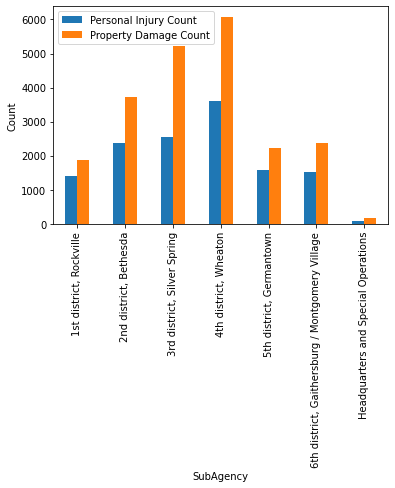

In [16]:
# Select relevant data for the task
df_task3 = data.select('SubAgency','Personal Injury','Property Damage')

#Filter data where Personal injury or Property Damage has been occured
df_task3 = df_task3.where((df_task3['Personal Injury']=='Yes') | (df_task3['Property Damage']=='Yes'))

# Take count of each
count_pi = 0
count_pd = 0 
df_task3 = df_task3.withColumn('piCount',f.when((f.col("Personal Injury") == 'Yes') , count_pi+1).otherwise(count_pi)).withColumn('pdCount',f.when((f.col("Property Damage") == 'Yes') , count_pd+1).otherwise(count_pd))

# Grouping in to SubAgency
group_data = df_task3.groupBy('SubAgency').agg(sum('piCount').alias('Personal Injury Count'),
                                  sum('pdCount').alias('Property Damage Count'))
group_data.show()

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()

# Chart
table = pd.pivot_table(data=df_pandas,index=['SubAgency'])
table.plot(kind='bar',rot=90, ylabel='Count')


### **3. Identify the locations of maximum number of traffic violations which occur due to alcohol consumption**

+--------------------+----------------------------+
|            Location|Number of Alcohol Violations|
+--------------------+----------------------------+
|RIDGE RD AND BETH...|                          77|
|WOODFIELD ROAD AN...|                          53|
|RIDGE ROAD AND BR...|                          42|
|RIDGE ROAD AND BE...|                          34|
|FATHER HURLEY BLV...|                          32|
|VEIRS MILL RD @ N...|                          26|
|RIDGE ROAD AND OA...|                          25|
|WHITES FERRY RD/W...|                          25|
|RIDGE RD AND APPL...|                          23|
|NEW HAMPSHIRE AVE...|                          22|
|10904 BETHESDA CH...|                          19|
|GEORGIA AVE / ROS...|                          18|
|SHADY GROVE RD / ...|                          17|
|CENTURY BLVD AND ...|                          17|
|RIDGE ROAD AND SK...|                          17|
| RIDGE RD AND OAK DR|                          16|
|WESTLAKE DR

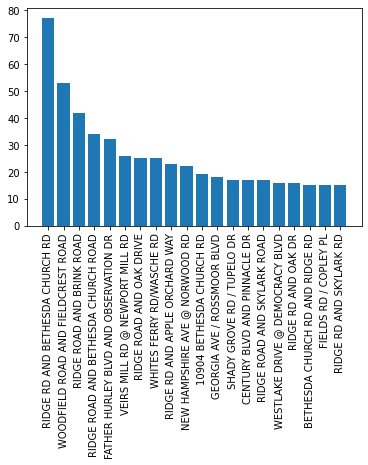

In [17]:
# Select relevant Columns
df_task4 = data.select('Location','Alcohol')

# Filter location that Alchol violation has been happened.
df_task4 = df_task4.where(df_task4['Alcohol']=='Yes')
# df_task4.show()

# Group by the Locations
group_data = df_task4.groupby('Location').agg(count('Alcohol').alias('Number of Alcohol Violations'))
group_data = group_data.sort(col("Number of Alcohol Violations").desc()).limit(20)
group_data.show()

# Chart
pd_task4 = group_data.toPandas()

plt.bar(pd_task4["Location"],pd_task4["Number of Alcohol Violations"])
plt.xticks(rotation=90)

# visualize chart
plt.show()


### **4. Identify whether there is a relationship between manufacturer of the vehicle and accidents**

+------+-----------------------+-------------------+
|  Make|Contributed To Accident|Number of Accidents|
+------+-----------------------+-------------------+
|TOYOTA|                    Yes|               3548|
| HONDA|                    Yes|               3306|
|  FORD|                    Yes|               2824|
|NISSAN|                    Yes|               1519|
|  TOYT|                    Yes|               1365|
+------+-----------------------+-------------------+



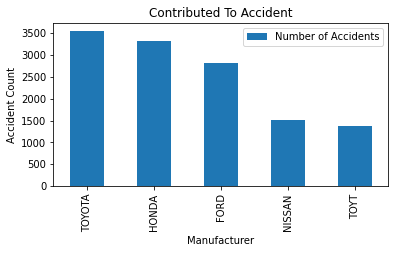

In [18]:
# Select relevent columns
df_task8 = data.select('Make','Contributed To Accident')

# Filter the data where accidents occur
df_task8 = df_task8.where(df_task8['Contributed to Accident'] == 'Yes')

# Group data from Vehicle type.
group_data = df_task8.groupby(["Make","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")

group_data = group_data.sort(col("Number of Accidents").desc()).limit(5)

# Dipaly Data
group_data.show()
group_data.count()

# Chart
group_data = group_data.toPandas()
group_data.plot.bar(title="Contributed To Accident",x='Make',y='Number of Accidents',figsize=(6,3),xlabel='Manufacturer',ylabel='Accident Count');

### **5. The number of accidents which occur due to traffic violations based on vehicle type**

+--------------------+-----------------------+-------------------+
|         VehicleType|Contributed To Accident|Number of Accidents|
+--------------------+-----------------------+-------------------+
|     02 - Automobile|                    Yes|              23354|
|05 - Light Duty T...|                    Yes|               1319|
|          28 - Other|                    Yes|                529|
|     01 - Motorcycle|                    Yes|                348|
|  03 - Station Wagon|                    Yes|                338|
+--------------------+-----------------------+-------------------+



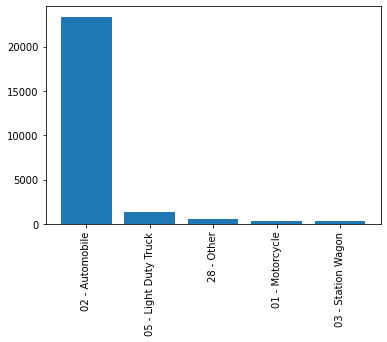

In [19]:
# Select relevent columns
df_task1 = data.select('VehicleType','Contributed To Accident')
# df_task1.show()

# Filter the data where accidents occur
df_task1 = df_task1.where(df_task1['Contributed to Accident'] == 'Yes')

# Group data from Vehicle type.
group_data = df_task1.groupby(["VehicleType","Contributed To Accident"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data = group_data.sort(col('Number of Accidents').desc()).limit(5)

# Dipaly Data
group_data.show()

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Chart
plt.bar(df_pandas["VehicleType"],df_pandas["Number of Accidents"])
plt.xticks(rotation=90)

# visualize chart
plt.show()


### **6. Identify the correlation between accidents and time of the day**

+----+-----------------------+-------------------+
|hour|Contributed To Accident|Number of Accidents|
+----+-----------------------+-------------------+
|   0|                    Yes|              25569|
|   1|                    Yes|              20469|
|   2|                    Yes|              17916|
|   3|                    Yes|              21800|
|   4|                    Yes|              11633|
|   5|                    Yes|               8236|
|   6|                    Yes|              11085|
|   7|                    Yes|              21691|
|   8|                    Yes|              32125|
|   9|                    Yes|              25794|
|  10|                    Yes|              18292|
|  11|                    Yes|              21732|
|  12|                    Yes|              20813|
|  13|                    Yes|              20124|
|  14|                    Yes|              25619|
|  15|                    Yes|              33790|
|  16|                    Yes| 

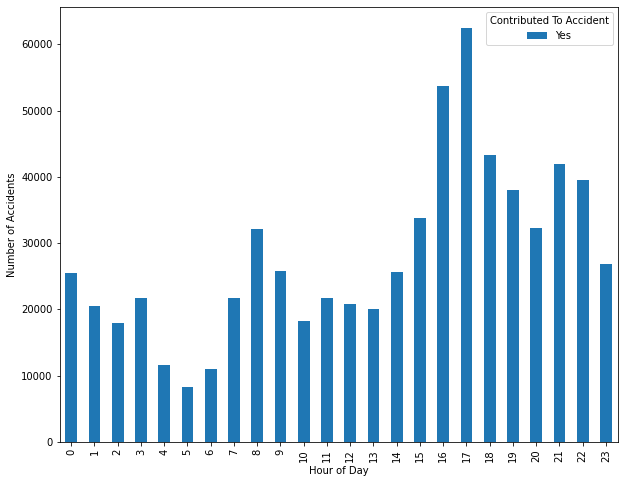

In [20]:
# Select relevent columns
df_task15 = data.select('Time Of Stop','Contributed To Accident')

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

#Sort above based on time
#sorted=group_data.orderBy('Time Of Stop')
#sorted.show()

# Here contain 24hr clock. To get more simple consider only the hour that accident is happened. 
#Take the hour for each timestamp
sorted = (df_task15.select("Time Of Stop").withColumn("hour", hour("Time Of Stop")))


#Join above datafrmaes by outter join.
df = df_task15.join(sorted, on=['Time Of Stop'], how='outer')



# Group data from Vehicle type.
group_data = df.groupby(["hour","Contributed To Accident"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data=group_data.sort('hour')

# Dipaly Data
group_data.show()


# Chart
# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="hour",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Accidents")


# Visualize the data
plt.show()



### **7. Identify the sub agencies which occur the least number of accidents**

+--------------------+-------------------+
|           SubAgency|Number of Accidents|
+--------------------+-------------------+
|Headquarters and ...|                250|
|5th district, Ger...|               2501|
|1st district, Roc...|               2645|
|6th district, Gai...|               3103|
|3rd district, Sil...|               5140|
|2nd district, Bet...|               5152|
|4th district, Whe...|               7849|
+--------------------+-------------------+



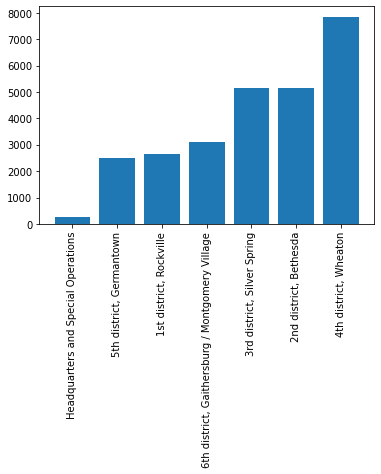

In [21]:
# Select relevent columns
df_task1 = data.select('SubAgency','Contributed to Accident')

# Filter the data where Accidents occured
df_task1 = df_task1.where(df_task1['Contributed to Accident'] == 'Yes')

# Remove null values
df_task1.dropna(subset=["Contributed to Accident"])

# Group data into SubAgencies and Renaming aggregated column
group_data = df_task1.groupby("SubAgency").agg(count("Contributed to Accident").alias('Number of Accidents'))

# Sort data by count
group_data = group_data.sort('Number of Accidents')

# Display data
group_data.show()

# Convert Dataframe to pandas
df_pandas = group_data.toPandas()

# Plot the chart using matplotlib
plt.bar(df_pandas["SubAgency"],df_pandas["Number of Accidents"])
plt.xticks(rotation=90)

# visualize chart
plt.show()

### **8. Identify the most commonly occurring violation type which causes an accident traffic violation(Warning, Citation, SERO) from 2012 to 2018**

+--------------+----+--------------------+
|Violation Type|Year|Number of Violations|
+--------------+----+--------------------+
|         ESERO|2014|                8212|
|      Citation|2012|               55999|
|       Warning|2015|              115926|
|      Citation|2018|               28109|
|       Warning|2018|               42665|
|         ESERO|2017|                8850|
|         ESERO|2015|               13828|
|       Warning|2012|                4692|
|      Citation|2014|               66311|
|         ESERO|2018|                3719|
|         ESERO|2013|                7254|
|      Citation|2013|               85065|
|       Warning|2017|              102487|
|       Warning|2013|               40715|
|          SERO|2013|                   2|
|      Citation|2015|              105595|
|      Citation|2017|               77436|
|       Warning|2016|              108036|
|         ESERO|2016|               10827|
|      Citation|2016|              100790|
+----------

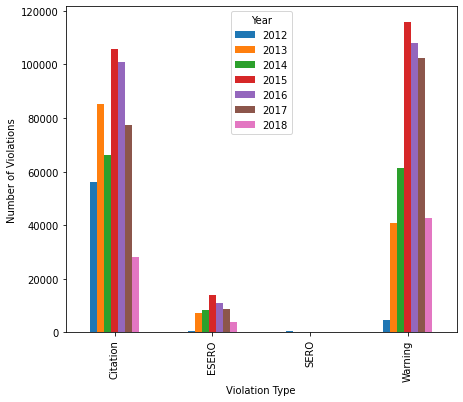

In [22]:
# Select relevent columns 
df_task2 = data.select(f.year(f.to_timestamp(data['Date Of Stop'],'MM/dd/yyyy')).alias('Year'),data['Violation Type'])

# Remove null values in Year
df_task2.dropna(subset=["Year"])

# Filter data between 2012 and 2018
df_task2 = df_task2.where((df_task2['Year']>='2012') & (df_task2['Year']<='2018'))

# Group data from Violation type and Year. Rename the aggregated column
group_data = df_task2.groupby(["Violation Type","Year"]).agg({"Year":"count"})
group_data = group_data.withColumnRenamed("count(Year)","Number of Violations")

# Dipaly Data
group_data.show()

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()

# Creating Pviot using 3 dimensions(Violation Type, Year,Count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Violations",
	index="Violation Type",
	columns="Year",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)

# Change the axes labels
ax.set_xlabel("Violation Type")
ax.set_ylabel("Number of Violations")

# Visualize the data
plt.show()

### **9. Probability of contributing to accidents with respect to manufacturing year**

In [23]:
df = data.select('Year','make','Contributed To Accident')
df = df.dropna(subset=['Year'])
df_grouped = df.groupby('Year','make').agg(count('Contributed To Accident').alias('All Count'))
df_grouped.show()
print(df_grouped.count())
df_yes = df.where(col('Contributed To Accident')=='Yes')
df_yes = df_yes.groupby('Year','make').agg(count('Contributed To Accident').alias('Yes Count'))
df_yes.show()
df_yes.count()

+----+-----------+---------+
|Year|       make|All Count|
+----+-----------+---------+
|1996|       FORD|     1434|
|1996|       CHEV|      466|
|2010|       CHEV|     1358|
|2001|   CHRYSLER|      397|
|2005|      LOTUS|        5|
|1990|      VOLVO|       64|
|2014|   CHRYSLER|      438|
|1987|  MERECEDES|        5|
|2014|     ACURRA|        2|
|1998|     TOYTOA|       21|
|2006|MINIVAL2006|        3|
|2005|  CADIALLAC|        1|
|2005|       HUMM|       14|
|2000|RANGE ROVER|        4|
|2016|   INFINITY|       32|
|2004|       VOLO|        1|
|2006|     PONIAC|        5|
|   0|    BICYCLE|       10|
|1998|      INFIN|        4|
|2004|    CHRYLER|        2|
+----+-----------+---------+
only showing top 20 rows

11777
+----+--------------+---------+
|Year|          make|Yes Count|
+----+--------------+---------+
|1996|          FORD|       45|
|2014|      CHRYSLER|       10|
|1998|        TOYTOA|        1|
|2010|          CHEV|       20|
|2001|      CHRYSLER|        7|
|1996|          

1951

In [24]:
df_joined = df_yes.join(df_grouped, on=['year','make'], how='left')
df_joined.show()
df_joined.count()

+----+--------------+---------+---------+
|Year|          make|Yes Count|All Count|
+----+--------------+---------+---------+
|1966|           CHY|        2|        2|
|1996|          CHEV|       13|      466|
|1996|          FORD|       45|     1434|
|1998|        TOYTOA|        1|       21|
|1998|VAN HOOL T2145|        1|        1|
|2001|      CHRYSLER|        7|      397|
|2003|            UD|        1|        4|
|2005|    GILLIG LLC|        1|        1|
|2010|          CHEV|       20|     1358|
|2014|      CHRYSLER|       10|      438|
|1988|         CHEVY|        2|       40|
|1997|          HOND|       26|      911|
|1999| INTERNATIONAL|        2|       32|
|2006|        SUZUKI|        6|      239|
|2007|      INFINITI|       10|      406|
|2010|         MAZDA|       23|     1162|
|2017|          MACK|        1|        4|
|1989|           ABY|        1|        2|
|1994|        NISSAN|        7|      211|
|1996|        NISSAN|       17|      677|
+----+--------------+---------+---

1951

In [25]:
df = df_joined.withColumn("Ratio",col("Yes Count")/ col('All Count'))
df.show()
df = df.orderBy(col('Yes Count').desc()).limit(20)
df.show()

+----+--------------+---------+---------+--------------------+
|Year|          make|Yes Count|All Count|               Ratio|
+----+--------------+---------+---------+--------------------+
|1966|           CHY|        2|        2|                 1.0|
|1996|          CHEV|       13|      466|0.027896995708154508|
|1996|          FORD|       45|     1434| 0.03138075313807531|
|1998|        TOYTOA|        1|       21|0.047619047619047616|
|1998|VAN HOOL T2145|        1|        1|                 1.0|
|2001|      CHRYSLER|        7|      397|0.017632241813602016|
|2003|            UD|        1|        4|                0.25|
|2005|    GILLIG LLC|        1|        1|                 1.0|
|2010|          CHEV|       20|     1358|0.014727540500736377|
|2014|      CHRYSLER|       10|      438|  0.0228310502283105|
|1988|         CHEVY|        2|       40|                0.05|
|1997|          HOND|       26|      911| 0.02854006586169045|
|1999| INTERNATIONAL|        2|       32|              

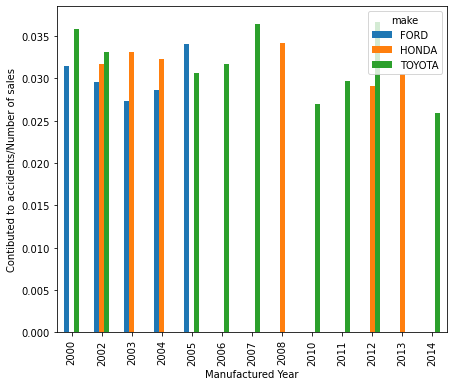

In [26]:
df = df.toPandas()
# Creating Pviot using 3 dimensions(Violation Type, Year,Count)
df_pivot = pd.pivot_table(
	df,
	values="Ratio",
	index="Year",
	columns="make",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)

# Change the axes labels
ax.set_xlabel("Manufactured Year")
ax.set_ylabel("Contibuted to accidents/Number of sales")

# Visualize the data
plt.show()


### **10. Indentify the correlation between accidents and time of the day with day of the week**

+----+---------+-----------------------+
|hour|     date|Contributed To Accident|
+----+---------+-----------------------+
|  17|   Monday|                    Yes|
|  14| Thursday|                    Yes|
|  14|   Monday|                    Yes|
|   9| Saturday|                    Yes|
|  18| Thursday|                    Yes|
|  15|   Sunday|                    Yes|
|  21|   Friday|                    Yes|
|   7| Thursday|                    Yes|
|  11|  Tuesday|                    Yes|
|   3|   Sunday|                    Yes|
|  15|   Sunday|                    Yes|
|  12|   Friday|                    Yes|
|  16|  Tuesday|                    Yes|
|  12| Saturday|                    Yes|
|  14|   Friday|                    Yes|
|  14|   Friday|                    Yes|
|   4|   Sunday|                    Yes|
|  13|  Tuesday|                    Yes|
|  16| Saturday|                    Yes|
|  14|Wednesday|                    Yes|
+----+---------+-----------------------+
only showing top

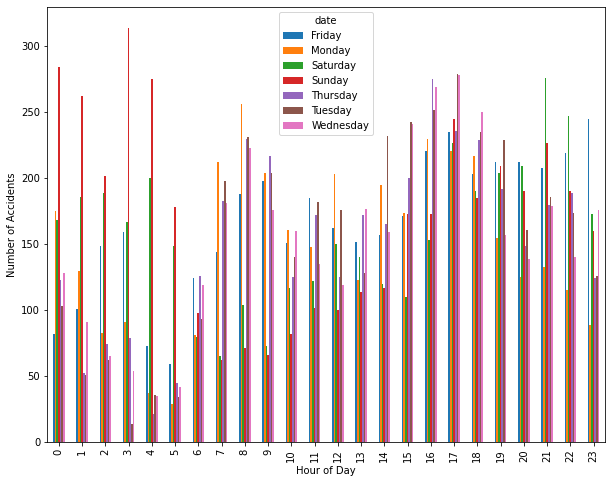

In [28]:
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
from pyspark.sql.window import Window

# Select relevent columns
df_task15 = data.select('Date Of Stop','Time Of Stop','Contributed To Accident')

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

# Filter the day of week where accidents occur
d_day= df_task15.select(hour("Time Of Stop").alias('hour'),from_unixtime(unix_timestamp('Date Of Stop', 'MM/dd/yyyy')).alias('date'),'Contributed To Accident')
d_day = d_day.withColumn("date", date_format(col("date"), "EEEE"))
d_day.show()
d_day = d_day.sort('hour')
# Group data.
d_day = d_day.groupby(["hour","date"]).agg(count("Contributed To Accident").alias('Number of Accidents'))
group_data = d_day.sort('hour')
group_data.show()


# Chart
# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="hour",
	columns="date",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Accidents")


# Visualize the data
plt.show()


### **11. Identify the most commonly occuring violation type which cause an accident from 2012 to 2018**

+----+---------------+-----------+--------------+
|Year|    VehicleType|       make|Violation Type|
+----+---------------+-----------+--------------+
|2013|02 - Automobile|       FORD|      Citation|
|2017|02 - Automobile|     TOYOTA|      Citation|
|2014|02 - Automobile|      HONDA|      Citation|
|2017|02 - Automobile|       DODG|      Citation|
|2017|02 - Automobile|MINI COOPER|      Citation|
|2013|02 - Automobile|    HYUNDAI|      Citation|
|2013|02 - Automobile|       FORD|      Citation|
|2015|02 - Automobile|      DODGE|      Citation|
|2017|02 - Automobile|MINI COOPER|      Citation|
|2017|02 - Automobile|MINI COOPER|      Citation|
|2014|02 - Automobile|       CADI|      Citation|
|2012|02 - Automobile|      HONDA|      Citation|
|2012|02 - Automobile|  CHEVROLET|      Citation|
|2012|02 - Automobile|       AUDI|      Citation|
|2012|02 - Automobile|       TOYT|      Citation|
|2012|02 - Automobile|      DODGE|      Citation|
|2013|02 - Automobile|     SATURN|      Citation|


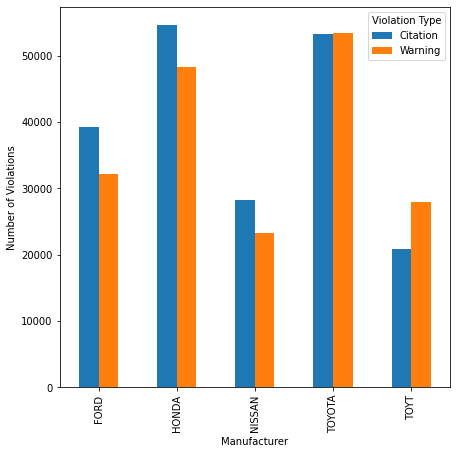

In [29]:
# Select relevent columns 
df_task2 = data.select(f.year(f.to_timestamp(data['Date Of Stop'],'MM/dd/yyyy')).alias('Year'),data['VehicleType'],data['make'],data['Violation Type'])
df_task2.show()

# Select only Automobiles
df_task2 = df_task2.where(df_task2['VehicleType']=='02 - Automobile')
df_task2.show()

df_task2 = df_task2.groupBy('Violation Type','make').agg(count('make').alias('Count'))
df_task2 = df_task2.sort(col('Count').desc()).limit(10)
df_task2.show()

# Dipaly Data
df_task2.show()

# convert DataFrame into Pandas
df_pandas = df_task2.toPandas()

# Creating Pviot using 3 dimensions(Violation Type, Year,Count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Count",
	index="make",
	columns="Violation Type",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(7, 7)

# Change the axes labels
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Number of Violations")

# Visualize the data
plt.show()